## Capstone Project

### Modeling Notebook - `DecisionTrees`  `COMBINED DATASET TREE` from 10/24/19

#### Importing Libraries

In [1]:
%matplotlib inline

# general libraries
import re
import string
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing date libraries
import datetime as dt
import dateutil.parser as dparser

# scikit-learn libraries for preprocessing
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scikit-learn libraries for constructing pipelines
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# scikit-learn libraries for clustering and dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_auc_score

# scikit-learn libraries for evaluation
from sklearn import metrics

# scikit-learn libraries for feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import RFECV

# scikit-learn libraries for learning
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, cross_validate, cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# saving models
import pickle
from sklearn.externals import joblib

# setting pandas display options
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 10000)
pd.set_option('display.max_colwidth', 100)
pd.set_option('precision', 5)
pd.options.mode.chained_assignment = None

/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


#### Directory/File Structure

In [2]:
sys.version

'3.6.9 |Anaconda custom (x86_64)| (default, Jul 30 2019, 13:42:17) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [3]:
print ('Running pandas version:', pd.__version__)
print ('Running numpy version:', np.__version__)
print ('Running sklearn version:', sklearn.__version__)

Running pandas version: 0.25.2
Running numpy version: 1.17.2
Running sklearn version: 0.21.3


In [4]:
os.getcwd()

'/Users/Shailesh/Desktop/MIDS/Capstone/w210CapstoneProject/notebooks'

In [5]:
os.chdir('../data')

In [6]:
sorted(os.listdir())

['.DS_Store',
 'Capstone_Fall_Shannon_Sept2019_request.csv',
 'POSTOP_ALL_col_names_11_9.pkl',
 'POSTOP_TREE_ALL_col_names_11_9.pkl',
 'POSTOP_categorical_TREE_col_names_11_14.pkl',
 'POSTOP_categorical_TREE_col_names_11_9.pkl',
 'POSTOP_categorical_col_names_11_14.pkl',
 'POSTOP_categorical_col_names_11_9.pkl',
 'POSTOP_numerical_col_names_11_14.pkl',
 'POSTOP_numerical_col_names_11_9.pkl',
 'PREOP_ALL_col_names_11_9.pkl',
 'PREOP_TREE_ALL_col_names_11_9.pkl',
 'PREOP_categorical_TREE_col_names_11_14.pkl',
 'PREOP_categorical_TREE_col_names_11_9.pkl',
 'PREOP_categorical_col_names_11_14.pkl',
 'PREOP_categorical_col_names_11_9.pkl',
 'PREOP_dataset_10_24.pkl',
 'PREOP_dataset_TREE_10_24.pkl',
 'PREOP_dataset_TREE_cabg.pkl',
 'PREOP_dataset_TREE_cabvalve.pkl',
 'PREOP_dataset_TREE_valve.pkl',
 'PREOP_dataset_cabg.pkl',
 'PREOP_dataset_cabvalve.pkl',
 'PREOP_dataset_valve.pkl',
 'PREOP_numerical_col_names_11_14.pkl',
 'PREOP_numerical_col_names_11_9.pkl',
 'PREPOST_dataset_COMBO_11_14.p

#### Loading Datasets

#### `X_train`, `y_train`
- designation of `_all` denotes complete feature set

In [7]:
X_train_all = pd.read_pickle('X_train_PREOP_TREE_10_27.pkl')
y_train = pd.read_pickle('y_train_PREOP_TREE_10_27.pkl')

In [8]:
X_train_all.shape, y_train.shape

((34192, 72), (34192,))

#### `X_dev`, `y_dev`
- designation of `_all` denotes complete feature set

In [9]:
X_dev_all = pd.read_pickle('X_dev_PREOP_TREE_10_27.pkl')
y_dev = pd.read_pickle('y_dev_PREOP_TREE_10_27.pkl')

In [10]:
X_dev_all.shape, y_dev.shape

((4274, 72), (4274,))

#### `X_test`, `y_test`
- designation of `_all` denotes complete feature set

In [11]:
X_test_all = pd.read_pickle('X_dev_PREOP_TREE_10_27.pkl')
y_test = pd.read_pickle('y_dev_PREOP_TREE_10_27.pkl')

In [12]:
X_test_all.shape, y_dev.shape

((4274, 72), (4274,))

- validating row count for `COMBINED DATASET TREE` from 10/27/19 - `42,740` total observations

In [13]:
42740 - X_train_all.shape[0] - X_dev_all.shape[0] - X_test_all.shape[0]

0

- last look at the data (`X_train_all`) before modeling

In [14]:
X_train_all.head()

,age,heightcm,weightkg,bmi,hct,creatlst,totalbumin,a1clvl,meldscr,hdef,pasys,surgdt_month,surgdt_DayOfWeek,surgdt_PartOfMonth,gender,racecaucasian,raceblack,raceasian,racenativeam,racnativepacific,ethnicity,diabetes,dyslip,dialysis,hypertn,infendo,slpapn,liverdis,immsupp,mediastrad,cancer,pvd,syncope,unrespstat,cvd,cva,cvdtia,cvdpcarsurg,hitanti,prcvint,prcab,prvalve,chf,priorhf,arrhyafib,medinotr,hdefd,vdaort,vdstena,vdstenm,diabctrl,infendty,Tobacco_Combined,chrlungd,hmo2,ivdrugab,alcohol,carshock24,resusc24,medasa,medaplt5days,medlipid,numdisv,anginalclass,classnyh,vdinsufm,vdinsuft,incidencREOP,status,cvdcarsten,cvdstenrt,cvdstenlft
0,-2.12457,0.11594,0.32942,0.15700,-2.65268,-0.35221,-2.27155,-1.62927,2.47597,0.98148,3.58585,10,2,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,3,1,1,0,0,0,0,0
1,1.08243,-0.82771,-0.95497,-0.39563,-0.10617,-0.13691,0.04597,0.25206,-0.29493,0.33103,0.49141,10,0,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0.0,0.0,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,3,4,2,2,1,0,0,0,0,0
2,-0.20037,1.53140,1.56497,0.35976,0.59504,-0.25533,-0.34028,0.32442,-0.67978,0.57495,-0.12748,10,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,2,2,0,0,0,0,0,0,0,0
3,0.44103,-0.31888,-0.21754,-0.04732,0.59504,-0.25533,0.04597,-0.76096,-0.29493,0.16842,-0.64322,11,3,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,3,2,0,2,2,0,0,0,0,0
4,-0.75014,-1.05900,0.19268,0.56118,-2.17290,-0.36298,0.04597,0.39678,-0.29493,0.57495,-0.65353,6,4,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,3,3,0,1,1,0,1,2,0,2


In [15]:
X_train_all.tail()

,age,heightcm,weightkg,bmi,hct,creatlst,totalbumin,a1clvl,meldscr,hdef,pasys,surgdt_month,surgdt_DayOfWeek,surgdt_PartOfMonth,gender,racecaucasian,raceblack,raceasian,racenativeam,racnativepacific,ethnicity,diabetes,dyslip,dialysis,hypertn,infendo,slpapn,liverdis,immsupp,mediastrad,cancer,pvd,syncope,unrespstat,cvd,cva,cvdtia,cvdpcarsurg,hitanti,prcvint,prcab,prvalve,chf,priorhf,arrhyafib,medinotr,hdefd,vdaort,vdstena,vdstenm,diabctrl,infendty,Tobacco_Combined,chrlungd,hmo2,ivdrugab,alcohol,carshock24,resusc24,medasa,medaplt5days,medlipid,numdisv,anginalclass,classnyh,vdinsufm,vdinsuft,incidencREOP,status,cvdcarsten,cvdstenrt,cvdstenlft
34187,-0.29200,0.58776,0.78848,0.26686,0.04145,-0.25533,0.04597,0.83093,-0.29493,0.00581,0.56361,1,3,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,3,3,0,1,2,0,1,0,0,0
34188,-1.11666,0.60626,-0.14917,-0.31935,-0.51214,-0.47063,-2.07842,0.61386,0.57972,-3.16512,1.62604,7,4,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,3,4,3,1,2,0,1,0,0,0
34189,0.62428,-1.05900,0.17314,0.54625,-0.32761,-0.07232,-0.34028,-1.05040,-0.45237,1.38800,-0.12748,3,0,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,2,1,3,1,1,0,0,1,0,0
34190,0.99080,-1.52157,0.75918,1.25109,-0.19844,-0.47063,0.62535,1.04801,-0.67978,0.57495,2.03863,10,3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0,0,0,2,3,0,0,0,0,0
34191,-0.20037,0.60626,0.71034,0.21143,-0.69667,-0.04003,-0.14715,3.14642,-0.36491,0.81886,-0.95266,12,1,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,3,4,0,1,0,0,1,0,0,0


## Random Forest Classifier
- see Albon 14.4 pages 238-240

- instantiating a `RandomForestClassifier()` object

In [16]:
rf_clf = RandomForestClassifier(class_weight='balanced',
                                random_state=0,
                                n_jobs=-1,
                                verbose=2)

#### Default `RandomForestClassifier()` Settings
- `n_estimators`: `10` -- number of trees in the forest
- `criterion`: `gini` -- function to measure the quality of split -- could also set for `entropy` 
- `max_depth`: `None` -- the maximum depth of the tree -- if `None`, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples 
- `max_features`: `Auto` -- `max_features=sqrt(n_features)` -- can put in a `float` to represent the number of features used -- per `Muller and Guido` page 88, increasing `max_features` might sometimes improve performance
- `min_samples_split`: `2` -- minimum number of samples required to split an internal node

- running out of the box with default settings only takes a few seconds

- creating a `StratifiedKFold` cross validation

In [17]:
skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=0)

- defining `scoring_metrics`

In [18]:
scoring_metrics = ['accuracy',
                   'f1',
                   'f1_macro',
                   'f1_weighted',
                   'precision',
                   'precision_macro',
                   'precision_weighted',
                   'recall',
                   'recall_macro',
                   'recall_weighted',
                   'roc_auc']

- conduct `StratifiedKFold` cross-validation

In [19]:
skf_results = cross_validate(rf_clf, # model
                             X_train_all, # feature matrix - X
                             y_train, # target vector - y
                             cv=skf, # cross-validation technique
                             scoring=scoring_metrics, # loss functions
                             return_train_score=True, # returns training score
                             verbose=2, # verbosity level to check progress of calculations
                             n_jobs=-1) # uses all computer cores                     

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.2s finished


In [20]:
all_features_results = pd.DataFrame(skf_results).drop(['fit_time', 'score_time'], axis=1)
all_features_results_summary = pd.DataFrame(all_features_results.T)
all_features_results_summary['mean_score'] = all_features_results_summary.mean(axis=1)
all_features_results_summary

,0,1,2,3,4,mean_score
test_accuracy,0.98289,0.98289,0.98304,0.98304,0.98304,0.98298
train_accuracy,0.99565,0.99543,0.99565,0.99510,0.99474,0.99531
test_f1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
train_f1,0.85327,0.84472,0.85363,0.83208,0.81726,0.84019
test_f1_macro,0.49569,0.49569,0.49572,0.49572,0.49572,0.49571
train_f1_macro,0.92553,0.92120,0.92571,0.91480,0.90729,0.91891
test_f1_weighted,0.97441,0.97441,0.97463,0.97463,0.97463,0.97454
train_f1_weighted,0.99534,0.99508,0.99534,0.99470,0.99426,0.99494
test_precision,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
train_precision,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


                                0        1        2        3        4  \
test_accuracy             0.98289  0.98289  0.98304  0.98304  0.98304   
train_accuracy            0.99565  0.99543  0.99565  0.99510  0.99474   
test_f1                   0.00000  0.00000  0.00000  0.00000  0.00000   
train_f1                  0.85327  0.84472  0.85363  0.83208  0.81726   
test_f1_macro             0.49569  0.49569  0.49572  0.49572  0.49572   
train_f1_macro            0.92553  0.92120  0.92571  0.91480  0.90729   
test_f1_weighted          0.97441  0.97441  0.97463  0.97463  0.97463   
train_f1_weighted         0.99534  0.99508  0.99534  0.99470  0.99426   
test_precision            0.00000  0.00000  0.00000  0.00000  0.00000   
train_precision           1.00000  1.00000  1.00000  1.00000  1.00000   
test_precision_macro      0.49145  0.49145  0.49152  0.49152  0.49152   
train_precision_macro     0.99780  0.99769  0.99780  0.99752  0.99734   
test_precision_weighted   0.96608  0.96608  0.96636

#### Key Takeaways
- Model is clearly overfitting
- Can tune `max_depth` parameter to see if that reduces overfitting - pre-prune trees

#### Varying `max_depth`

- instantiating a `RandomForestClassifier()` object

In [21]:
rf_clf = RandomForestClassifier(max_depth=5,
                                class_weight='balanced',
                                random_state=0,
                                n_jobs=-1,
                                verbose=2)

In [22]:
skf_results = cross_validate(rf_clf, # model
                             X_train_all, # feature matrix - X
                             y_train, # target vector - y
                             cv=skf, # cross-validation technique
                             scoring=scoring_metrics, # loss functions
                             return_train_score=True, # returns training score
                             verbose=2, # verbosity level to check progress of calculations
                             n_jobs=-1) # uses all computer cores                     

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.2s finished


In [23]:
all_features_results = pd.DataFrame(skf_results).drop(['fit_time', 'score_time'], axis=1)
all_features_results_summary = pd.DataFrame(all_features_results.T)
all_features_results_summary['mean_score'] = all_features_results_summary.mean(axis=1)
all_features_results_summary

,0,1,2,3,4,mean_score
test_accuracy,0.74762,0.76956,0.74130,0.75271,0.78078,0.75839
train_accuracy,0.75330,0.76639,0.75360,0.75993,0.78449,0.76354
test_f1,0.05476,0.05967,0.05350,0.05794,0.05066,0.05531
train_f1,0.08115,0.07952,0.07823,0.08141,0.08817,0.08170
test_f1_macro,0.45457,0.46418,0.45184,0.45781,0.46337,0.45835
train_f1_macro,0.46934,0.47287,0.46801,0.47166,0.48299,0.47297
test_f1_weighted,0.84069,0.85485,0.83666,0.84411,0.86208,0.84768
train_f1_weighted,0.84432,0.85284,0.84451,0.84862,0.86435,0.85093
test_precision,0.02926,0.03207,0.02852,0.03097,0.02734,0.02963
train_precision,0.04332,0.04261,0.04178,0.04354,0.04751,0.04375


#### Key Takeaways
- Varying `max_depth` significantly reduced overfitting
- We can next try increasing `n_estimators`
- Per `Muller and Guido` in `Introduction to Machine Learning with Python` page 88, "for `n_estimators`, larger is always better as averaging over more trees will yield a more robust ensemble by reducing overfitting"

#### Varying `n_estimators`

- instantiating a `RandomForestClassifier()` object

In [24]:
rf_clf = RandomForestClassifier(n_estimators=100,
                                max_depth=5,
                                class_weight='balanced',
                                random_state=0,
                                n_jobs=-1,
                                verbose=2)

In [25]:
skf_results = cross_validate(rf_clf, # model
                             X_train_all, # feature matrix - X
                             y_train, # target vector - y
                             cv=skf, # cross-validation technique
                             scoring=scoring_metrics, # loss functions
                             return_train_score=True, # returns training score
                             verbose=2, # verbosity level to check progress of calculations
                             n_jobs=-1) # uses all computer cores              

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.6s finished


In [26]:
all_features_results = pd.DataFrame(skf_results).drop(['fit_time', 'score_time'], axis=1)
all_features_results_summary = pd.DataFrame(all_features_results.T)
all_features_results_summary['mean_score'] = all_features_results_summary.mean(axis=1)
all_features_results_summary

,0,1,2,3,4,mean_score
test_accuracy,0.79003,0.78871,0.77347,0.79365,0.79014,0.78720
train_accuracy,0.79721,0.79041,0.78464,0.79791,0.79689,0.79341
test_f1,0.06753,0.05863,0.05144,0.06121,0.05778,0.05932
train_f1,0.09878,0.09702,0.09578,0.10055,0.10068,0.09856
test_f1_macro,0.47461,0.46982,0.46141,0.47265,0.46985,0.46967
train_f1_macro,0.49227,0.48923,0.48677,0.49336,0.49310,0.49095
test_f1_weighted,0.86777,0.86693,0.85747,0.87013,0.86794,0.86605
train_f1_weighted,0.87237,0.86811,0.86444,0.87278,0.87214,0.86997
test_precision,0.03654,0.03173,0.02769,0.03317,0.03127,0.03208
train_precision,0.05343,0.05235,0.05158,0.05440,0.05445,0.05324


#### Key Takeaways
- marginal improvement from increasing `n_estimators`, but it something we can tune using `GridSearchCV`
- let's try changing `criterion` to `entropy`

#### Changing `criterion` to `entropy`

- instantiating a `RandomForestClassifier()` object

In [27]:
rf_clf = RandomForestClassifier(n_estimators=100,
                                max_depth=5,
                                criterion='entropy',
                                class_weight='balanced',
                                random_state=0,
                                n_jobs=-1,
                                verbose=2)

In [28]:
skf_results = cross_validate(rf_clf, # model
                             X_train_all, # feature matrix - X
                             y_train, # target vector - y
                             cv=skf, # cross-validation technique
                             scoring=scoring_metrics, # loss functions
                             return_train_score=True, # returns training score
                             verbose=2, # verbosity level to check progress of calculations
                             n_jobs=-1) # uses all computer cores              

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s finished


In [29]:
all_features_results = pd.DataFrame(skf_results).drop(['fit_time', 'score_time'], axis=1)
all_features_results_summary = pd.DataFrame(all_features_results.T)
all_features_results_summary['mean_score'] = all_features_results_summary.mean(axis=1)
all_features_results_summary

,0,1,2,3,4,mean_score
test_accuracy,0.79003,0.78637,0.76353,0.78795,0.77815,0.78121
train_accuracy,0.79191,0.78909,0.77952,0.79517,0.78372,0.78788
test_f1,0.07115,0.06883,0.05050,0.05844,0.05718,0.06122
train_f1,0.09651,0.09591,0.09404,0.09760,0.09430,0.09567
test_f1_macro,0.47639,0.47409,0.45772,0.46948,0.46573,0.46868
train_f1_macro,0.48946,0.48827,0.48426,0.49104,0.48575,0.48776
test_f1_weighted,0.86777,0.86548,0.85113,0.86657,0.86042,0.86228
train_f1_weighted,0.86905,0.86728,0.86119,0.87107,0.86386,0.86649
test_precision,0.03849,0.03719,0.02710,0.03160,0.03081,0.03304
train_precision,0.05210,0.05172,0.05056,0.05276,0.05077,0.05158


#### Key Takeaways
- no material change and also took longer to calculate, so will go back to using default of `gini`

### Hyperparameter Tuning with `RandomizedSearchCV`
- there are lots of other parameters to tune, so let's try to narrow down our possibilities
- this took more than 10 minutes to run, so saved model which will be reloaded in subsequent runs

In [64]:
random_grid = {'n_estimators': [100, 150, 200, 250],          # default is `10`
               'max_features': ['auto', 0.25, 0.50],          # default is square root of `n_features`
               'max_depth': [2, 5, 10, 20, None],             # default is `None`
               'min_samples_split': [2, 5, 10]}               # default is `2`

- instantiating the base model to tune

In [31]:
rf_clf = RandomForestClassifier(class_weight='balanced')

- Random search of parameters, using 3 fold cross validation
- Search across 50 different combinations, and use all available cores

In [32]:
rf_random_model = RandomizedSearchCV(estimator=rf_clf, 
                                     param_distributions=random_grid, 
                                     n_iter=100, 
                                     cv=3,
                                     scoring='roc_auc',
                                     verbose=2, 
                                     random_state=42, 
                                  n_jobs=-1)

- fitting the random search model

In [33]:
#rf_random_model.fit(X_train_all, y_train)

- takes 10 minutes to run

#### Saving `rf_random model`

In [34]:
#joblib.dump(rf_random_model, 'rf_randomized_search.sav')

#### Loading saved `rf_random model`

In [35]:
loaded_rf_random_model = joblib.load('rf_randomized_search.sav')

In [36]:
loaded_rf_random_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 2}

- examining results

In [37]:
randomized_search_results = pd.DataFrame(loaded_rf_random_model.cv_results_)

In [38]:
randomized_search_results = randomized_search_results.sort_values(by=['mean_test_score'],
                                                                  ascending=False)

In [39]:
display_cols = ['params',
                'mean_test_score']

In [40]:
randomized_search_results_summary = randomized_search_results.copy()[display_cols].reset_index(drop=True)

In [41]:
randomized_search_results_summary.head(20)

,params,mean_test_score
0,"{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 2}",0.66698
1,"{'n_estimators': 150, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 2}",0.66630
2,"{'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 2}",0.66563
3,"{'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 2}",0.66499
4,"{'n_estimators': 250, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 2}",0.66461
5,"{'n_estimators': 200, 'min_samples_split': 10, 'max_features': 0.25, 'max_depth': 2}",0.66416
6,"{'n_estimators': 200, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 2}",0.66375
7,"{'n_estimators': 200, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 5}",0.66328
8,"{'n_estimators': 250, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 5}",0.66297
9,"{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 2}",0.66276


#### Key Takeaways
- clear that `max_depth` is the key parameter - dominates the top 10 results
- will run a `GridSearchCV` to confirm

### Tuning `RandomForestClassifier()` Hyperparameters using `GridSearchCV`
- instantiating a `RandomForestClassifier()` object

In [42]:
rf_clf = RandomForestClassifier(class_weight='balanced',
                                random_state=0)

- defining hyperparamter candidates

In [43]:
hyper_params = {'n_estimators': [200],          
                'max_features': ['auto'],          
                'max_depth': [2, 5],             
                'min_samples_split': [2, 5, 10]}               

- create `GridSearchCV` object

In [44]:
gs = GridSearchCV(rf_clf, # estimator
                  hyper_params, # param_grid
                  scoring=scoring_metrics, # loss functions
                  cv=5, 
                  refit='roc_auc', # best_estimator_ will be based on this scoring metric
                  verbose=2,
                  return_train_score=True,
                  n_jobs=-1)

- fit `GridSearchcV`

In [45]:
rf_gs_model = gs.fit(X_train_all,
                     y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


- examining results

In [46]:
gs_results = pd.DataFrame(rf_gs_model.cv_results_)

In [47]:
gs_results = gs_results.sort_values(by=['mean_test_roc_auc'],
                                           ascending=False)

In [48]:
display_cols = ['params',
                'rank_test_roc_auc',
                'mean_test_roc_auc',
                'mean_train_roc_auc']

In [49]:
gs_results_summary = gs_results.copy()[display_cols].reset_index(drop=True)

In [50]:
gs_results_summary

,params,rank_test_roc_auc,mean_test_roc_auc,mean_train_roc_auc
0,"{'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200}",1,0.66622,0.70836
1,"{'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 200}",1,0.66622,0.70836
2,"{'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 200}",1,0.66622,0.70836
3,"{'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 200}",4,0.66293,0.81551
4,"{'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200}",5,0.66246,0.81561
5,"{'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 200}",6,0.66244,0.81561


### Identifying Important Features in Random Forests
- see Albon 14.6, page 241-243

#### Calculating Feature Importances

In [51]:
importances = rf_gs_model.best_estimator_.feature_importances_

- sort importances in descending order

In [52]:
indicies = np.argsort(importances)[::-1]

- rearrange feature names so they match the sorted feature importances

In [53]:
names = [X_train_all.columns.tolist()[i] for i in indicies]

In [54]:
important_features = pd.DataFrame(list(zip(indicies, 
                                           names, 
                                           importances)),
                                  columns=['index_number', 
                                           'feature_name', 
                                           'feature_importance']).sort_values(by='feature_importance',
                                                                              ascending=False).reset_index(drop=True)

- top features

In [55]:
important_features.head(10)

,index_number,feature_name,feature_importance
0,0,age,0.13122
1,11,surgdt_month,0.10837
2,2,weightkg,0.08837
3,34,cvd,0.08445
4,4,hct,0.06592
5,30,cancer,0.05619
6,50,diabctrl,0.05016
7,35,cva,0.04937
8,31,pvd,0.04759
9,18,racenativeam,0.02515


- selecting the top 25 features ranked by feature importance

In [56]:
top_features = important_features['feature_name'].values.tolist()[:25]

### Let's see if reducing the number of features improves results

- instantiating a `RandomForestClassifier()` object

In [57]:
rf_clf = RandomForestClassifier(n_estimators=200,
                                class_weight='balanced',
                                random_state=0,
                                n_jobs=-1,
                                verbose=2)

- using only the top features identified above

In [58]:
X_train_top = X_train_all.copy()[top_features]

In [59]:
skf_results = cross_validate(rf_clf, # model
                             X_train_top, # feature matrix - X
                             y_train, # target vector - y
                             cv=skf, # cross-validation technique
                             scoring=scoring_metrics, # loss functions
                             return_train_score=True, # returns training score
                             verbose=2, # verbosity level to check progress of calculations
                             n_jobs=-1) # uses all computer cores              

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.0s finished


In [60]:
all_features_results = pd.DataFrame(skf_results).drop(['fit_time', 'score_time'], axis=1)
all_features_results_summary = pd.DataFrame(all_features_results.T)
all_features_results_summary['mean_score'] = all_features_results_summary.mean(axis=1)
all_features_results_summary

,0,1,2,3,4,mean_score
test_accuracy,0.98289,0.98289,0.98304,0.98304,0.98304,0.98298
train_accuracy,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
test_f1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
train_f1,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
test_f1_macro,0.49569,0.49569,0.49572,0.49572,0.49572,0.49571
train_f1_macro,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
test_f1_weighted,0.97441,0.97441,0.97463,0.97463,0.97463,0.97454
train_f1_weighted,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
test_precision,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
train_precision,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


#### Key Takeaways
- Limiting feature set to the top features did not improve results at all with out of the box settings
- Let's try one more scenario using the hyperparameters from our grid search

#### Using `GridSearchCV` Hyperparameters and Top Features

In [61]:
rf_clf = RandomForestClassifier(n_estimators=200,
                                max_depth=2,
                                min_samples_split=2,
                                class_weight='balanced',
                                random_state=0,
                                n_jobs=-1,
                                verbose=2)

In [62]:
skf_results = cross_validate(rf_clf, # model
                             X_train_top, # feature matrix - X
                             y_train, # target vector - y
                             cv=skf, # cross-validation technique
                             scoring=scoring_metrics, # loss functions
                             return_train_score=True, # returns training score
                             verbose=2, # verbosity level to check progress of calculations
                             n_jobs=-1) # uses all computer cores              

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.9s finished


In [63]:
all_features_results = pd.DataFrame(skf_results).drop(['fit_time', 'score_time'], axis=1)
all_features_results_summary = pd.DataFrame(all_features_results.T)
all_features_results_summary['mean_score'] = all_features_results_summary.mean(axis=1)
all_features_results_summary

,0,1,2,3,4,mean_score
test_accuracy,0.66121,0.65682,0.65399,0.65853,0.65706,0.65752
train_accuracy,0.66391,0.65331,0.66038,0.66451,0.66184,0.66079
test_f1,0.05544,0.05325,0.04750,0.05351,0.05329,0.05260
train_f1,0.05626,0.05614,0.05800,0.05751,0.05747,0.05708
test_f1_macro,0.42451,0.42184,0.41805,0.42260,0.42195,0.42179
train_f1_macro,0.42590,0.42190,0.42542,0.42672,0.42571,0.42513
test_f1_weighted,0.78096,0.77782,0.77603,0.77916,0.77810,0.77841
train_f1_weighted,0.78298,0.77522,0.78033,0.78336,0.78141,0.78066
test_precision,0.02911,0.02794,0.02492,0.02807,0.02795,0.02760
train_precision,0.02954,0.02943,0.03044,0.03020,0.03017,0.02996


### Final Takeaways
- `RandomForestClassifier` results in similar results to `LogisticRegression` and `STS` model in terms of `roc_auc` scores

## Begin new work (11/2)

In [42]:
for w in [1,5,10,100,500,1000]:
    print('---Weight of {} for Stroke class---'.format(w))
    rf_clf = RandomForestClassifier(n_estimators=200,
                                max_depth=2,
                                min_samples_split=2,
                                class_weight={0:1,1:w},
                                random_state=0,
                                n_jobs=-1,
                                verbose=1)
    skf_results = cross_validate(rf_clf, # model
                             X_train_all, # feature matrix - X
                             y_train, # target vector - y
                             cv=skf, # cross-validation technique
                             scoring=scoring_metrics, # loss functions
                             return_train_score=True, # returns training score
                             verbose=2, # verbosity level to check progress of calculations
                             n_jobs=-1) # uses all computer cores  
    all_features_results = pd.DataFrame(skf_results).drop(['fit_time', 'score_time'], axis=1)
    all_features_results_summary = pd.DataFrame(all_features_results.T)
    all_features_results_summary['mean_score'] = all_features_results_summary.mean(axis=1)
    print(all_features_results_summary['mean_score']['test_roc_auc'])

---Weight of 1 for Stroke class---


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.6726964536521935
---Weight of 5 for Stroke class---


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.6742379792812495
---Weight of 10 for Stroke class---


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.6750075621238504
---Weight of 100 for Stroke class---


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.6671118816388082
---Weight of 500 for Stroke class---


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.6372148918178937
---Weight of 1000 for Stroke class---
0.6000010040448538


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.7s finished


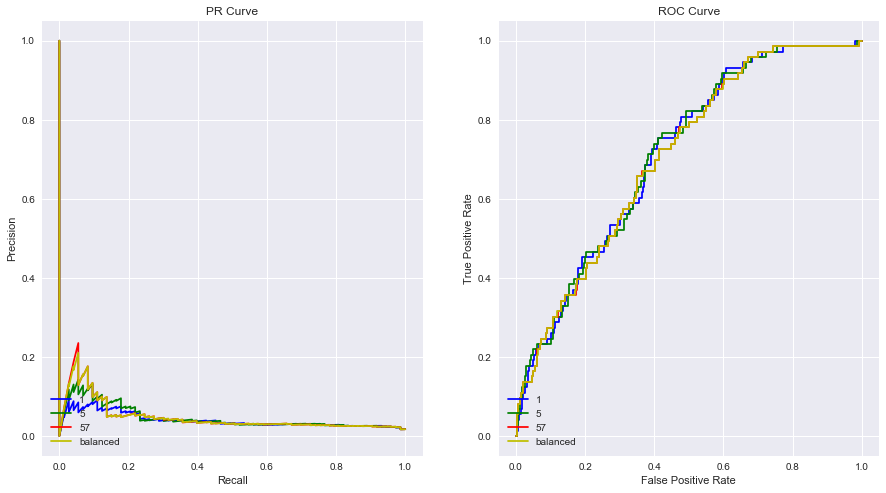

In [50]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
#1,5,10,20,50,100,10000
for w,k in zip([1,5,57],'bgrcmykw'):
    rf_clf = RandomForestClassifier(n_estimators=200,
                                max_depth=2,
                                min_samples_split=2,
                                class_weight={0:1,1:w},
                                random_state=0,
                                n_jobs=-1,
                                verbose=0)
    rf_clf.fit(X_train_all,y_train)
    pred_prob = rf_clf.predict_proba(X_dev_all)[:,1]

    p,r,_ = precision_recall_curve(y_dev,pred_prob)
    tpr,fpr,_ = roc_curve(y_dev,pred_prob)
    
    ax1.plot(r,p,c=k,label=w)
    ax2.plot(tpr,fpr,c=k,label=w)
    
rf_clf = RandomForestClassifier(n_estimators=200,
                                max_depth=2,
                                min_samples_split=2,
                                class_weight='balanced',
                                random_state=0,
                                n_jobs=-1,
                                verbose=0)
rf_clf.fit(X_train_all,y_train)
pred_prob = rf_clf.predict_proba(X_dev_all)[:,1]

p,r,_ = precision_recall_curve(y_dev,pred_prob)
tpr,fpr,_ = roc_curve(y_dev,pred_prob)

ax1.plot(r,p,c='y',label='balanced')
ax2.plot(tpr,fpr,c='y',label='balanced')
ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')

plt.show()

In [51]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.RandomOverSampler.html

Using TensorFlow backend.


In [52]:
ros = RandomOverSampler(1, random_state = 4) #50-50 split stroke to no-stroke
X_res, y_res = ros.fit_sample(X=X_train_all, y=y_train)

0.046500498034897225
0.04556888695572396


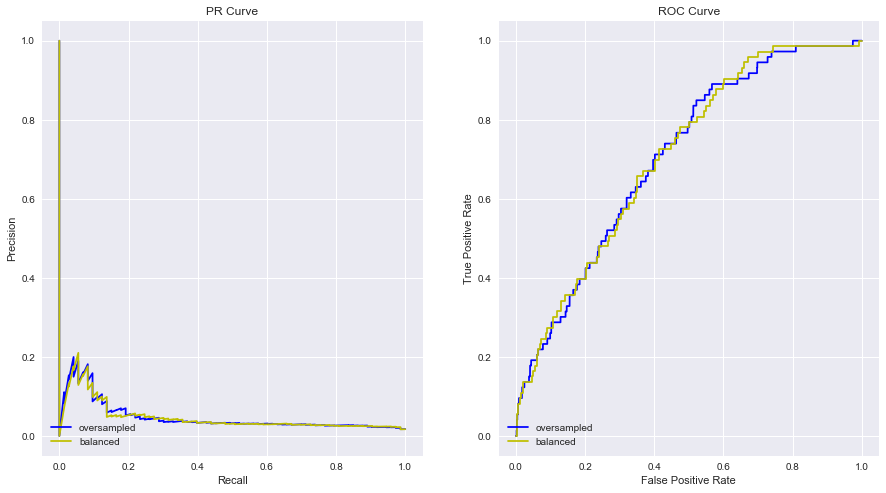

In [59]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
#1,5,10,20,50,100,10000
for w,k in zip([1],'bgrcmykw'):
    rf_clf = RandomForestClassifier(n_estimators=200,
                                max_depth=2,
                                min_samples_split=2,
                                class_weight={0:1,1:w},
                                random_state=0,
                                n_jobs=-1,
                                verbose=0)
    rf_clf.fit(X_res,y_res)
    pred_prob = rf_clf.predict_proba(X_dev_all)[:,1]

    p,r,_ = precision_recall_curve(y_dev,pred_prob)
    area = auc(r, p)
    print(area)
    tpr,fpr,_ = roc_curve(y_dev,pred_prob)
    
    ax1.plot(r,p,c=k,label='oversampled')
    ax2.plot(tpr,fpr,c=k,label='oversampled')
    
rf_clf = RandomForestClassifier(n_estimators=200,
                                max_depth=2,
                                min_samples_split=2,
                                class_weight='balanced',
                                random_state=0,
                                n_jobs=-1,
                                verbose=0)
rf_clf.fit(X_train_all,y_train)
pred_prob = rf_clf.predict_proba(X_dev_all)[:,1]

p,r,_ = precision_recall_curve(y_dev,pred_prob)
area = auc(r, p)
print(area)
tpr,fpr,_ = roc_curve(y_dev,pred_prob)

ax1.plot(r,p,c='y',label='balanced')
ax2.plot(tpr,fpr,c='y',label='balanced')
ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')

plt.show()

In [61]:
def area_under_pr_curve(y_dev, pred_prob):
    p,r,_ = precision_recall_curve(y_dev,pred_prob)
    return auc(r, p)

prScorer = make_scorer(area_under_pr_curve, greater_is_better=True,needs_proba=True)

In [62]:
metrics = {'main': 'roc_auc',
          'custom': prScorer}

In [73]:
rf_random_model = RandomizedSearchCV(estimator=rf_clf, 
                                     param_distributions=random_grid, 
                                     n_iter=100, 
                                     cv=3,
                                     scoring=metrics,
                                     verbose=2, 
                                     random_state=42, 
                                  n_jobs=-1,
                                    refit = 'custom')

In [74]:
rf_random_model.fit(X_train_all, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=2,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=200, n_jobs=-1,
                                                    

In [75]:
rf_random_model.best_score_

0.03220659027885988

In [79]:
random_grid = {'n_estimators': [100, 150, 200, 250],          # default is `10`
               'max_features': ['auto', 0.25, 0.50],          # default is square root of `n_features`
               'max_depth': [2, 5, 10, 20, None],             # default is `None`
               'min_samples_split': [2, 5, 10]}               # default is `2`
storageDict = {}
conditions = {}
maxPRArea = 0
maxPRConditions = ''
maxROCArea = 0
maxROCConditions = ''
for n in random_grid['n_estimators']:
    storageDict[n] = {}
    for f in random_grid['max_features']:
        storageDict[n][f] = {}
        for d in random_grid['max_depth']:
            storageDict[n][f][d] = {}
            for s in random_grid['min_samples_split']:
                
                rf_clf = RandomForestClassifier(n_estimators=n,
                                max_depth=d,
                                min_samples_split=s,
                                class_weight='balanced',
                                max_features = f,
                                random_state=0,
                                n_jobs=-1,
                                verbose=0)
                rf_clf.fit(X_train_all,y_train)
                pred_prob = rf_clf.predict_proba(X_dev_all)[:,1]

                condition = 'n=' + str(n) + 'f=' + str(f) + 'd=' + str(d) + 's=' + str(s)
                
                p,r,_ = precision_recall_curve(y_dev,pred_prob)
                prArea = auc(r, p)
                
                if(prArea > maxPRArea):
                    maxPRArea = prArea
                    maxPRConditions = condition
                    

                tpr,fpr,_ = roc_curve(y_dev,pred_prob)
                rocArea = roc_auc_score(y_dev, pred_prob)
                
                if(rocArea > maxROCArea):
                    maxROCArea = rocArea
                    maxROCConditions = condition
                
                storageDict[n][f][d][s] = (p,r,tpr,fpr)
                conditions[condition] = (prArea, rocArea)

In [94]:
print("Max ROC Area: " + str(round(maxROCArea,3)))
print("Max PR Area: " + str(round(maxPRArea,3)))

Max ROC Area: 0.728
Max PR Area: 0.046


In [81]:
print("Best ROC conditions: " + maxROCConditions)
print("Best PR conditions: " + maxPRConditions)

Best ROC conditions: n=250f=0.25d=Nones=10
Best PR conditions: n=200f=autod=2s=2


In [102]:
optimalN = 200
optimalF = 'auto' #72 features and auto is sqrt so ~.11
optimalD = 2
optimalS = 2

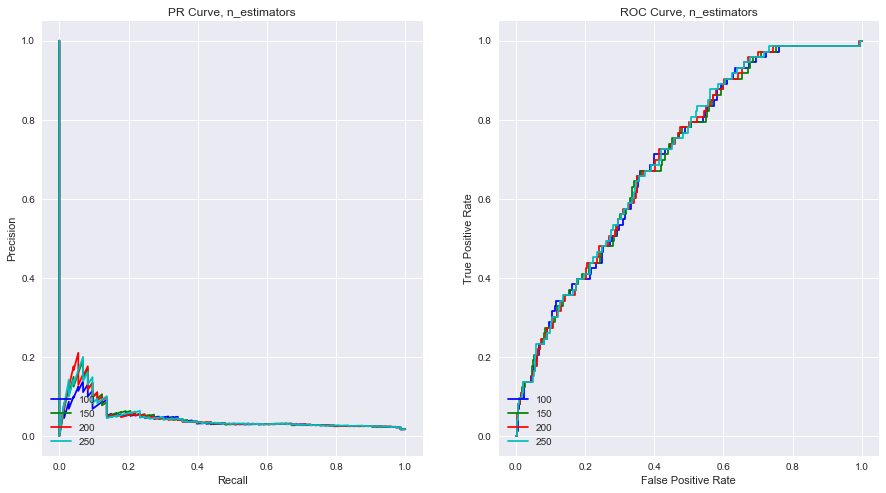

In [96]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve, n_estimators')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve, n_estimators')

for n,k in zip(random_grid['n_estimators'],'bgrcmykw'):
        
    p,r,tpr,fpr = storageDict[n][optimalF][optimalD][optimalS]
    ax1.plot(r,p,c=k,label=n)
    ax2.plot(tpr,fpr,c=k,label=n)
    
ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')

plt.show()

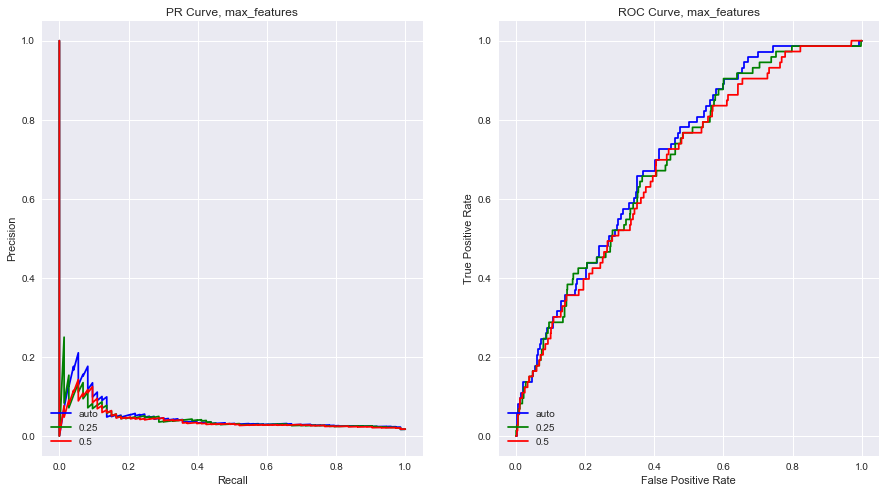

In [97]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve, max_features')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve, max_features')

for f,k in zip(random_grid['max_features'],'bgrcmykw'):
        
    p,r,tpr,fpr = storageDict[optimalN][f][optimalD][optimalS]
    ax1.plot(r,p,c=k,label=f)
    ax2.plot(tpr,fpr,c=k,label=f)
    
ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')

plt.show()

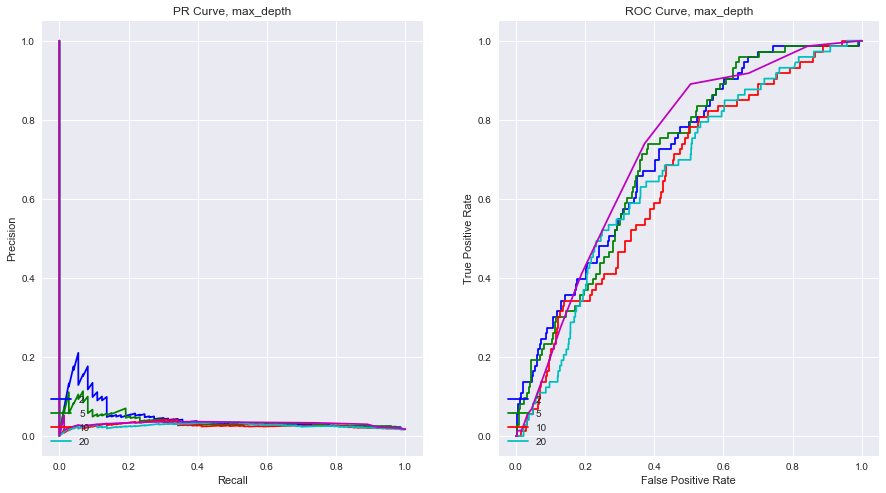

In [98]:

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve, max_depth')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve, max_depth')

for d,k in zip(random_grid['max_depth'],'bgrcmykw'):

    p,r,tpr,fpr = storageDict[optimalN][optimalF][d][optimalS]
    ax1.plot(r,p,c=k,label=d)
    ax2.plot(tpr,fpr,c=k,label=d)
    
ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')

plt.show()

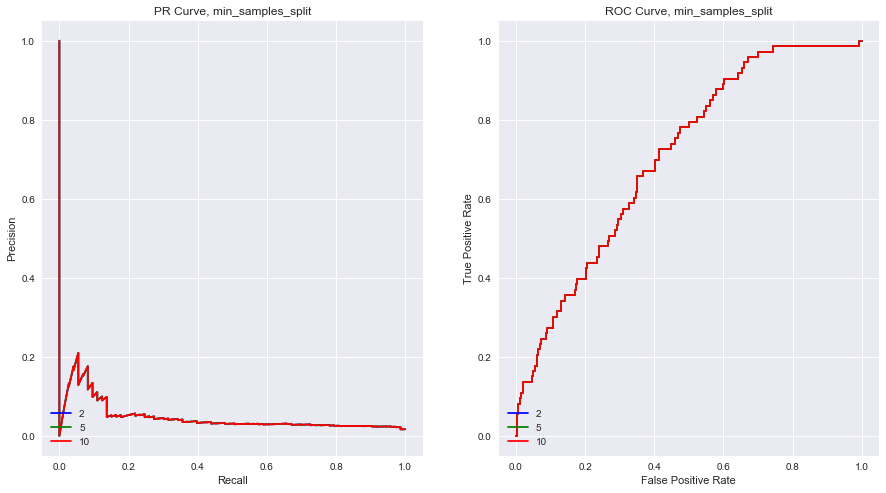

In [99]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve, min_samples_split')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve, min_samples_split')

for s,k in zip(random_grid['min_samples_split'],'bgrcmykw'):

    p,r,tpr,fpr = storageDict[optimalN][optimalF][optimalD][s]
    ax1.plot(r,p,c=k,label=s)
    ax2.plot(tpr,fpr,c=k,label=s)
    
ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')

plt.show()

In [106]:
storageDict1 = storageDict
conditions1 = conditions
maxPRArea1 = maxPRArea
maxPRConditions1 = maxPRConditions
maxROCArea1 = maxROCArea
maxROCConditions1 = maxROCConditions

(34192, 72)

In [103]:
random_grid2 = {'n_estimators': [175, 200, 225],          # default is `10`
               'max_features': [0.05, 0.08, 0.11, 0.15], # default is square root of `n_features`
               'max_depth': [2, 3, 4, 5, None],             # default is `None`
               'min_samples_split': [10, 50, 100]}               # default is `2`
storageDict2 = {}
conditions2 = {}
maxPRArea2 = 0
maxPRConditions2 = ''
maxROCArea2 = 0
maxROCConditions2 = ''
for n in random_grid2['n_estimators']:
    storageDict2[n] = {}
    for f in random_grid2['max_features']:
        storageDict2[n][f] = {}
        for d in random_grid2['max_depth']:
            storageDict2[n][f][d] = {}
            for s in random_grid2['min_samples_split']:
                
                rf_clf = RandomForestClassifier(n_estimators=n,
                                max_depth=d,
                                min_samples_split=s,
                                class_weight='balanced',
                                max_features = f,
                                random_state=0,
                                n_jobs=-1,
                                verbose=0)
                rf_clf.fit(X_train_all,y_train)
                pred_prob = rf_clf.predict_proba(X_dev_all)[:,1]

                condition = 'n=' + str(n) + 'f=' + str(f) + 'd=' + str(d) + 's=' + str(s)
                
                p,r,_ = precision_recall_curve(y_dev,pred_prob)
                prArea = auc(r, p)
                
                if(prArea > maxPRArea2):
                    maxPRArea2 = prArea
                    maxPRConditions2 = condition
                    

                tpr,fpr,_ = roc_curve(y_dev,pred_prob)
                rocArea = roc_auc_score(y_dev, pred_prob)
                
                if(rocArea > maxROCArea2):
                    maxROCArea2 = rocArea
                    maxROCConditions2 = condition
                
                storageDict2[n][f][d][s] = (p,r,tpr,fpr)
                conditions2[condition] = (prArea, rocArea)

In [104]:
print("Max ROC Area: " + str(round(maxROCArea2,3)))
print("Max PR Area: " + str(round(maxPRArea2,3)))
print("Best ROC conditions: " + maxROCConditions2)
print("Best PR conditions: " + maxPRConditions2)

Max ROC Area: 0.734
Max PR Area: 0.064
Best ROC conditions: n=225f=0.11d=Nones=50
Best PR conditions: n=175f=0.11d=4s=50


In [124]:
def findBestParms(random_grid, verbose = False):
    storageDict = {}
    conditions = {}
    maxPRArea = 0
    maxPRConditions = ''
    maxROCArea = 0
    maxROCConditions = ''
    for n in random_grid['n_estimators']:
        storageDict[n] = {}
        for f in random_grid['max_features']:
            storageDict[n][f] = {}
            for d in random_grid['max_depth']:
                storageDict[n][f][d] = {}
                for s in random_grid['min_samples_split']:

                    rf_clf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    min_samples_split=s,
                                    class_weight='balanced',
                                    max_features = f,
                                    random_state=0,
                                    n_jobs=-1,
                                    verbose=0)
                    rf_clf.fit(X_train_all,y_train)
                    pred_prob = rf_clf.predict_proba(X_dev_all)[:,1]

                    condition = 'n=' + str(n) + 'f=' + str(f) + 'd=' + str(d) + 's=' + str(s)

                    p,r,_ = precision_recall_curve(y_dev,pred_prob)
                    prArea = auc(r, p)

                    if(prArea > maxPRArea):
                        maxPRArea = prArea
                        maxPRConditions = condition


                    tpr,fpr,_ = roc_curve(y_dev,pred_prob)
                    rocArea = roc_auc_score(y_dev, pred_prob)

                    if(rocArea > maxROCArea):
                        maxROCArea = rocArea
                        maxROCConditions = condition

                    if (verbose):
                        print(condition + " ROC: " + str(rocArea))

                    storageDict[n][f][d][s] = (p,r,tpr,fpr)
                    conditions[condition] = (prArea, rocArea)
    print("Max ROC Area: " + str(round(maxROCArea,3)))
    print("Max PR Area: " + str(round(maxPRArea,3)))
    print("Best ROC conditions: " + maxROCConditions)
    print("Best PR conditions: " + maxPRConditions)
    return storageDict, conditions

In [109]:
random_grid3 = {'n_estimators': [220, 225, 230],          # default is `10`
               'max_features': [0.08, 0.11, 0.13,  0.15], # default is square root of `n_features`
               'max_depth': [2, 3, 4, 5, None],             # default is `None`
               'min_samples_split': [40, 50, 60]}               # default is `2`
storageDict3, conditions3 = findBestParms(random_grid3)

Max ROC Area: 0.735
Max PR Area: 0.064
Best ROC conditions: n=230f=0.11d=Nones=50
Best PR conditions: n=230f=0.11d=4s=40


In [110]:
random_grid4 = {'n_estimators': [225, 230, 235],          # default is `10`
               'max_features': [0.10, 0.11, 0.12], # default is square root of `n_features`
               'max_depth': [2, 5, 10,  None],             # default is `None`
               'min_samples_split': [40, 50, 70, 100]}               # default is `2`
storageDict4, conditions4 = findBestParms(random_grid4)

Max ROC Area: 0.74
Max PR Area: 0.054
Best ROC conditions: n=235f=0.12d=Nones=50
Best PR conditions: n=235f=0.1d=5s=100


In [111]:
random_grid5 = {'n_estimators': [232, 235, 240],          # default is `10`
               'max_features': [0.11, 0.12,  0.13, 0.15], # default is square root of `n_features`
               'max_depth': [2, 3, 4, 5, None],             # default is `None`
               'min_samples_split': [40, 50, 60]}               # default is `2`
storageDict5, conditions5 = findBestParms(random_grid5)

Max ROC Area: 0.741
Max PR Area: 0.062
Best ROC conditions: n=240f=0.12d=Nones=50
Best PR conditions: n=240f=0.11d=4s=60


In [112]:
random_grid6 = {'n_estimators': [240, 241, 242, 243, 244, 245],          # default is `10`
               'max_features': [0.11, 0.12,  0.13, 0.15], # default is square root of `n_features`
               'max_depth': [2, 3, 4, 5, None],             # default is `None`
               'min_samples_split': [40, 50, 60]}               # default is `2`
storageDict6, conditions6 = findBestParms(random_grid6)

Max ROC Area: 0.741
Max PR Area: 0.062
Best ROC conditions: n=245f=0.12d=Nones=50
Best PR conditions: n=245f=0.11d=4s=50


In [113]:
random_grid7 = {'n_estimators': [245, 246, 247, 248, 249, 250],          # default is `10`
               'max_features': [0.11, 0.12,  0.13, 0.15], # default is square root of `n_features`
               'max_depth': [2, 3, 4, 5, None],             # default is `None`
               'min_samples_split': [40, 50, 60]}               # default is `2`
storageDict7, conditions7 = findBestParms(random_grid7)

Max ROC Area: 0.742
Max PR Area: 0.062
Best ROC conditions: n=250f=0.11d=Nones=50
Best PR conditions: n=250f=0.11d=4s=40


In [125]:
random_grid8 = {'n_estimators': [250, 275, 300],          # default is `10`
               'max_features': [0.11, 0.12,  0.13, 0.15], # default is square root of `n_features`
               'max_depth': [2, 3, 4, 5, None],             # default is `None`
               'min_samples_split': [40, 50, 60]}               # default is `2`
storageDict8, conditions8 = findBestParms(random_grid8)

Max ROC Area: 0.742
Max PR Area: 0.065
Best ROC conditions: n=250f=0.11d=Nones=50
Best PR conditions: n=275f=0.11d=4s=40


In [126]:
random_grid9 = {'n_estimators': [300, 325, 350],          # default is `10`
               'max_features': [0.10, 0.11, 0.12,  0.13, 0.15], # default is square root of `n_features`
               'max_depth': [2, 3, 4, 5, None],             # default is `None`
               'min_samples_split': [40, 50, 60]}               # default is `2`
storageDict9, conditions9 = findBestParms(random_grid9)

Max ROC Area: 0.742
Max PR Area: 0.064
Best ROC conditions: n=325f=0.1d=Nones=50
Best PR conditions: n=300f=0.1d=4s=40


In [127]:
random_grid10 = {'n_estimators': [320, 325, 330],          # default is `10`
               'max_features': [0.09, 0.10, 0.11, 0.12], # default is square root of `n_features`
               'max_depth': [2, 3, 4, 5, None],             # default is `None`
               'min_samples_split': [40, 50, 60]}               # default is `2`
storageDict10, conditions10 = findBestParms(random_grid10)

Max ROC Area: 0.742
Max PR Area: 0.063
Best ROC conditions: n=320f=0.1d=Nones=50
Best PR conditions: n=320f=0.1d=4s=40


In [128]:
random_grid11 = {'n_estimators': [315, 320, 322],          # default is `10`
               'max_features': [0.09, 0.10, 0.11], # default is square root of `n_features`
               'max_depth': [2, 5, None],             # default is `None`
               'min_samples_split': [40, 50, 60]}               # default is `2`
storageDict11, conditions11 = findBestParms(random_grid11)

Max ROC Area: 0.743
Max PR Area: 0.045
Best ROC conditions: n=315f=0.1d=Nones=50
Best PR conditions: n=322f=0.09d=5s=60


In [129]:
random_grid12 = {'n_estimators': [305, 310, 315],          # default is `10`
               'max_features': [0.09, 0.10, 0.11], # default is square root of `n_features`
               'max_depth': [2, 5, None],             # default is `None`
               'min_samples_split': [40, 50, 60]}               # default is `2`
storageDict12, conditions12 = findBestParms(random_grid12)

Max ROC Area: 0.743
Max PR Area: 0.044
Best ROC conditions: n=315f=0.1d=Nones=50
Best PR conditions: n=315f=0.09d=5s=40


In [130]:
random_grid13 = {'n_estimators': [315],          # default is `10`
               'max_features': [ 0.10], # default is square root of `n_features`
               'max_depth': [None],             # default is `None`
               'min_samples_split': [45, 50, 55]}               # default is `2`
storageDict13, conditions13 = findBestParms(random_grid13)

Max ROC Area: 0.743
Max PR Area: 0.04
Best ROC conditions: n=315f=0.1d=Nones=50
Best PR conditions: n=315f=0.1d=Nones=50


Best conditions are n = 315, f = 0.1, d = None, and s = 50

Let's make some plots to show how varying factors around this affects AUC

In [147]:
def plotCurves(random_grid, storageDict, variable, optimals):
    optimalN, optimalF, optimalD, optimalS = optimals
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlim([-0.05,1.05])
    ax1.set_ylim([-0.05,1.05])
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('PR Curve, ' + variable)

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlim([-0.05,1.05])
    ax2.set_ylim([-0.05,1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve,  ' + variable)

    for v,k in zip(random_grid[variable],'bgrcmykw'):
        if(variable == 'n_estimators'):
            p,r,tpr,fpr = storageDict[v][optimalF][optimalD][optimalS]
        if(variable == 'max_features'):
            p,r,tpr,fpr = storageDict[optimalN][v][optimalD][optimalS]
        if(variable == 'max_depth'):
            p,r,tpr,fpr = storageDict[optimalN][optimalF][v][optimalS]
        if(variable == 'min_samples_split'):
            p,r,tpr,fpr = storageDict[optimalN][optimalF][optimalD][v]
        ax1.plot(r,p,c=k,label=v)
        ax2.plot(tpr,fpr,c=k,label=v)

    ax1.legend(loc='lower left')    
    ax2.legend(loc='lower left')

    plt.show()

In [148]:
optimals = (315, 0.1, None, 50)

Max ROC Area: 0.743
Max PR Area: 0.04
Best ROC conditions: n=315f=0.1d=Nones=50
Best PR conditions: n=315f=0.1d=Nones=50


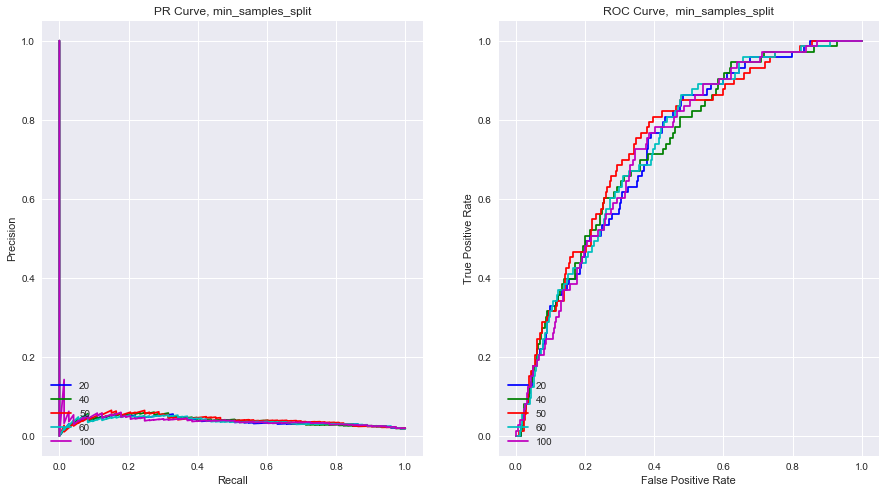

In [149]:
random_grid14 = {'n_estimators': [315],          # default is `10`
               'max_features': [ 0.10], # default is square root of `n_features`
               'max_depth': [None],             # default is `None`
               'min_samples_split': [20, 40, 50, 60, 100]}               # default is `2`
storageDict14, conditions14 = findBestParms(random_grid14)
plotCurves(random_grid14, storageDict14, 'min_samples_split', optimals)

Max ROC Area: 0.743
Max PR Area: 0.043
Best ROC conditions: n=315f=0.1d=Nones=50
Best PR conditions: n=315f=0.1d=2s=50


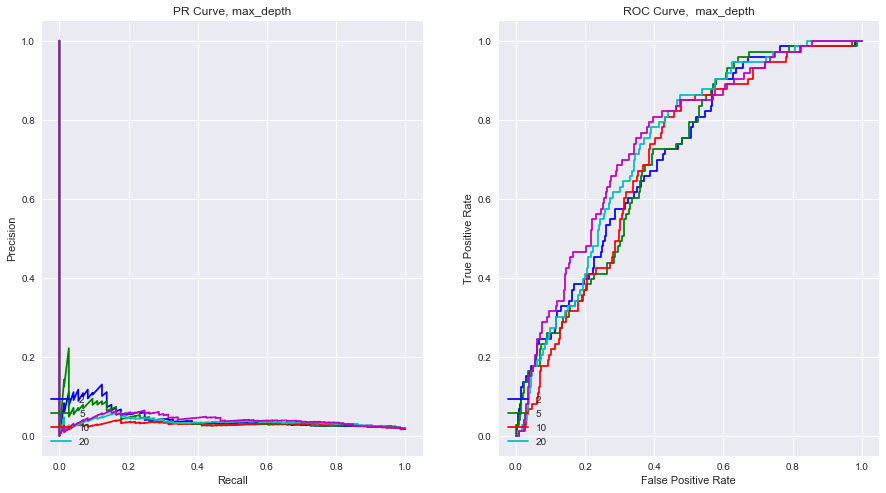

In [150]:
random_grid15 = {'n_estimators': [315],          # default is `10`
               'max_features': [ 0.10], # default is square root of `n_features`
               'max_depth': [2, 5, 10, 20, None],             # default is `None`
               'min_samples_split': [50]}               # default is `2`
storageDict15, conditions15 = findBestParms(random_grid15)
plotCurves(random_grid15, storageDict15, 'max_depth', optimals)

Max ROC Area: 0.743
Max PR Area: 0.04
Best ROC conditions: n=315f=0.1d=Nones=50
Best PR conditions: n=315f=0.1d=Nones=50


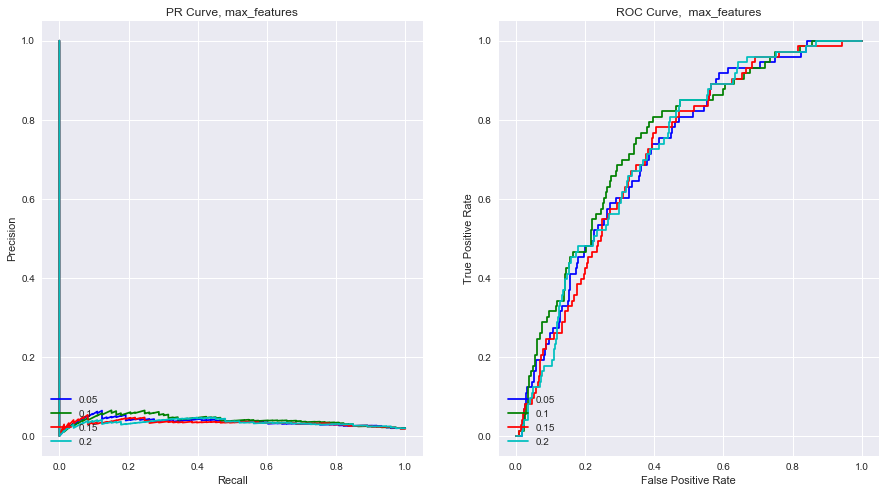

In [151]:
random_grid16 = {'n_estimators': [315],          # default is `10`
               'max_features': [0.05, 0.10, 0.15, 0.20], # default is square root of `n_features`
               'max_depth': [None],             # default is `None`
               'min_samples_split': [50]}               # default is `2`
storageDict16, conditions16 = findBestParms(random_grid16)
plotCurves(random_grid16, storageDict16, 'max_features', optimals)

Max ROC Area: 0.743
Max PR Area: 0.04
Best ROC conditions: n=315f=0.1d=Nones=50
Best PR conditions: n=315f=0.1d=Nones=50


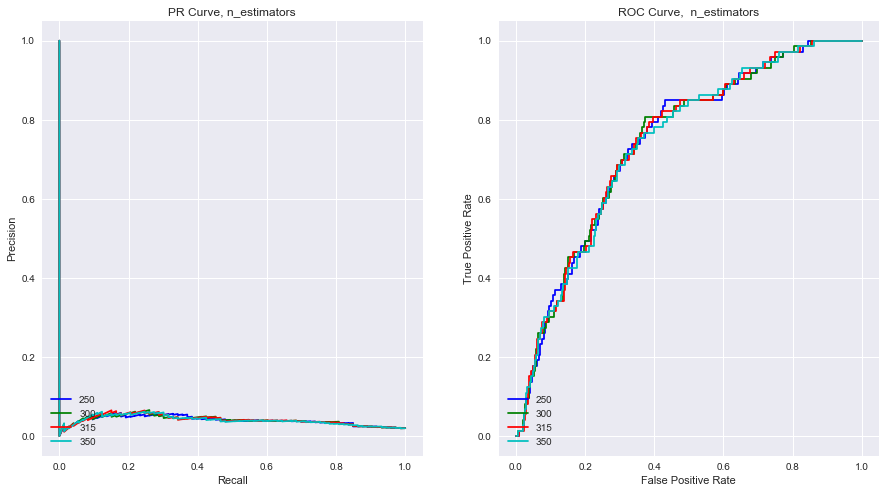

In [152]:
random_grid17 = {'n_estimators': [250, 300, 315, 350],          # default is `10`
               'max_features': [0.10], # default is square root of `n_features`
               'max_depth': [None],             # default is `None`
               'min_samples_split': [50]}               # default is `2`
storageDict17, conditions17 = findBestParms(random_grid17)
plotCurves(random_grid17, storageDict17, 'n_estimators', optimals)

In [38]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(n_values='auto',handle_unknown='ignore', categorical_features = np.arange(11,72))

In [39]:
X_transform = enc.fit_transform(X_train_all)

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:391: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. n_values='auto' can be replaced with categories='auto'.
  warnings.warn(msg, DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [43]:
X_dev_transform = enc.transform(X_dev_all)

In [27]:
import xgboost as xgb
from xgboost import XGBClassifier

In [40]:
model = XGBClassifier()
model.fit(X_transform, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [44]:
y_pred = model.predict(X_dev_transform)

In [49]:
pred = pd.DataFrame(y_pred)

In [51]:
tpr,fpr,_ = roc_curve(y_dev,pred)
rocArea = roc_auc_score(y_dev, pred)
print(rocArea)

0.5


In [41]:
data_dmatrix = xgb.DMatrix(data=X_transform,label=y_train)

In [52]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [57]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [58]:
model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [60]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_transform,y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_transform, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  4.5min finished



 Time taken: 0 hours 5 minutes and 27.77 seconds.


In [61]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.6, gamma=5, learning_rate=0.02,
              max_delta_step=0, max_depth=5, min_child_weight=5, missing=None,
              n_estimators=600, n_jobs=1, nthread=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1.0)

 Best hyperparameters:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.6}


In [63]:
print(random_search.best_score_)

0.6701474884877272


In [ ]:
grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3 )
grid.fit(X, Y)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_)
print('\n Best parameters:')
print(grid.best_params_)

In [86]:
def modelfit(alg, dtrain, ytrain,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain, label=ytrain)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        print(cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain, ytrain,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(ytrain, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(ytrain, dtrain_predprob))

In [77]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, X_transform, y_train)

51

Model Report
Accuracy : 0.983
AUC Score (Train): 0.844844


TypeError: 'str' object is not callable

In [82]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=51, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_transform,y_train)
print(gsearch1.best_params_, gsearch1.best_score_)

{'max_depth': 7, 'min_child_weight': 3} 0.6753624656728464


In [81]:
param_test2 = {
 'max_depth':[6,7,8],
 'min_child_weight':[2,3,4]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=51, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_transform,y_train)
print(gsearch2.best_params_, gsearch2.best_score_)

{'max_depth': 7, 'min_child_weight': 3} 0.6753624656728464


In [83]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=51, max_depth=7,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_transform,y_train)
print(gsearch3.best_params_, gsearch3.best_score_)

{'gamma': 0.0} 0.6753624656728464


In [84]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, X_transform, y_train)

33

Model Report
Accuracy : 0.983
AUC Score (Train): 0.843132


TypeError: 'str' object is not callable

In [85]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=33, max_depth=7,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_transform,y_train)
print(gsearch4.best_params_, gsearch4.best_score_)

{'colsample_bytree': 0.8, 'subsample': 0.9} 0.6702444248546086


In [88]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=33, max_depth=7,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_transform,y_train)
print(gsearch5.best_params_, gsearch5.best_score_)

{'colsample_bytree': 0.75, 'subsample': 0.95} 0.6717478943337934


In [89]:
param_test6 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=33, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', scale_pos_weight=1, seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_transform,y_train)
print(gsearch6.best_params_, gsearch6.best_score_)

{'max_depth': 7, 'min_child_weight': 5} 0.6704685033321575


In [90]:
param_test7 = {
    'n_estimators':[33,51,100]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=33, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', scale_pos_weight=1, seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(X_transform,y_train)
print(gsearch7.best_params_, gsearch7.best_score_)

{'n_estimators': 51} 0.6641009955565096


In [92]:
param_test7 = {
    'n_estimators':[53,55,57]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=33, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', scale_pos_weight=1, seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(X_transform,y_train)
print(gsearch7.best_params_, gsearch7.best_score_)

{'n_estimators': 55} 0.6669230006332059


In [94]:
param_test8 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch8 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=55, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', scale_pos_weight=1, seed=27), 
 param_grid = param_test8, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch8.fit(X_transform,y_train)
print(gsearch8.best_params_, gsearch8.best_score_)

{'max_depth': 5, 'min_child_weight': 5} 0.6763702954250718


In [97]:
param_test7 = {
    'n_estimators':[85,90,95]
    #.668449 - 65
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=33, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', scale_pos_weight=1, seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(X_transform,y_train)
print(gsearch7.best_params_, gsearch7.best_score_)

{'n_estimators': 85} 0.6660269475992936


In [98]:
param_test8 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch8 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=65, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', scale_pos_weight=1, seed=27), 
 param_grid = param_test8, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch8.fit(X_transform,y_train)
print(gsearch8.best_params_, gsearch8.best_score_)

{'max_depth': 5, 'min_child_weight': 5} 0.6766614421258461
